In [1]:
import pandas as pd

# Import data
plays_df = pd.read_csv("Shakespeare_data.csv")

# Do some preliminary reorganization of data
plays_df[['Act','Scene','Line']] = plays_df['ActSceneLine'].str.split('.',expand= True).astype(float)
plays_df = plays_df.drop('ActSceneLine',axis=1)
plays_df.loc[(plays_df.Player == 'Shepard'),'Player']='Shepherd'

# Get data from A Winters Tale act 4 scene 4
wintersTale_df = plays_df[109775:110737]

# Get spoken lines
WintersTale_df = plays_df[plays_df['Play'] == 'A Winters Tale']
WintersTale4_4_df = WintersTale_df[WintersTale_df['Act'] == 4.0]
lines_df = WintersTale4_4_df[WintersTale4_4_df['Scene'] == 4.0]

# Get entrances from stage directions
entrances_df = wintersTale_df[wintersTale_df['PlayerLine'].str.contains('Enter') | wintersTale_df['PlayerLine'].str.contains('Re-enter')]

# Get exits from stage directions
exits_df = wintersTale_df[wintersTale_df['PlayerLine'].str.contains('Exit') | wintersTale_df['PlayerLine'].str.contains('Exeunt')]

In [2]:
entrances_df

,Dataline,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line
109775,109776,A Winters Tale,35.0,AUTOLYCUS,Enter FLORIZEL and PERDITA,NaN,NaN,NaN
109839,109840,A Winters Tale,9.0,FLORIZEL,"Enter Shepherd, Clown, MOPSA, DORCAS, and othe...",NaN,NaN,NaN
109989,109990,A Winters Tale,37.0,Shepherd,Enter Servant,NaN,NaN,NaN
110026,110027,A Winters Tale,47.0,PERDITA,"Enter AUTOLYCUS, singing",NaN,NaN,NaN
110135,110136,A Winters Tale,92.0,AUTOLYCUS,Re-enter Servant,NaN,NaN,NaN
110473,110474,A Winters Tale,163.0,CAMILLO,Re-enter AUTOLYCUS,NaN,NaN,NaN
110578,110579,A Winters Tale,189.0,AUTOLYCUS,Re-enter Clown and Shepherd,NaN,NaN,NaN


In [3]:
lines_df

,Dataline,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line
109776,109777,A Winters Tale,1.0,FLORIZEL,These your unusual weeds to each part of you,4.0,4.0,1.0
109777,109778,A Winters Tale,1.0,FLORIZEL,"Do give a life: no shepherdess, but Flora",4.0,4.0,2.0
109778,109779,A Winters Tale,1.0,FLORIZEL,Peering in April's front. This your sheep-shea...,4.0,4.0,3.0
109779,109780,A Winters Tale,1.0,FLORIZEL,"Is as a meeting of the petty gods,",4.0,4.0,4.0
109780,109781,A Winters Tale,1.0,FLORIZEL,And you the queen on't.,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
110731,110732,A Winters Tale,240.0,AUTOLYCUS,complaint they have to the king concerns him,4.0,4.0,925.0
110732,110733,A Winters Tale,240.0,AUTOLYCUS,"nothing, let him call me rogue for being so far",4.0,4.0,926.0
110733,110734,A Winters Tale,240.0,AUTOLYCUS,"officious, for I am proof against that title and",4.0,4.0,927.0
110734,110735,A Winters Tale,240.0,AUTOLYCUS,what shame else belongs to't. To him will I pr...,4.0,4.0,928.0


In [4]:
exits_df

,Dataline,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line
110022,110023,A Winters Tale,45.0,PERDITA,Exit Servant,NaN,NaN,NaN
110122,110123,A Winters Tale,91.0,Clown,Exit with DORCAS and MOPSA,NaN,NaN,NaN
110134,110135,A Winters Tale,92.0,AUTOLYCUS,Exit,NaN,NaN,NaN
110154,110155,A Winters Tale,98.0,Servant,Exit,NaN,NaN,NaN
110282,110283,A Winters Tale,128.0,POLIXENES,Exit,NaN,NaN,NaN
110308,110309,A Winters Tale,131.0,Shepherd,Exit,NaN,NaN,NaN
110563,110564,A Winters Tale,188.0,CAMILLO,"Exeunt FLORIZEL, PERDITA, and CAMILLO",NaN,NaN,NaN
110723,110724,A Winters Tale,239.0,Shepherd,Exeunt Shepherd and Clown,NaN,NaN,NaN
110736,110737,A Winters Tale,240.0,AUTOLYCUS,Exit,NaN,NaN,NaN


In [5]:
# Get list of characters in scene and count their total number of lines
characters_df = lines_df.groupby(['Player']).size().reset_index()
characters_df.rename(columns = {0: 'Count'}, inplace = True)
characters_df

,Player,Count
0,AUTOLYCUS,189
1,CAMILLO,131
2,Clown,74
3,DORCAS,12
4,FLORIZEL,168
5,MOPSA,20
6,PERDITA,121
7,POLIXENES,95
8,Servant,35
9,Shepherd,84


In [6]:
# Get coappearances of characters
inlist = entrances_df.index.values.tolist()
outlist = exits_df.index.values.tolist()
inoutlist = inlist
for out in outlist:
    inoutlist.append(out)
inoutlist.sort()

co_ap = []
for change in range(len(inoutlist)-1):
    co_ap.append(plays_df[inoutlist[change]+1:inoutlist[change+1]])

In [7]:
# Count number of lines each character speaks in each coappearance
num_lines = []
for coappearance in co_ap:
    tmp_df = coappearance.groupby(['Player']).size().reset_index()
    tmp_df.rename(columns = {0: 'Count'}, inplace = True)
    num_lines.append(tmp_df)

In [8]:
# Count the number of lines each character speaks in the presence of each other character
interactions_count = {}
for character in characters_df['Player']:
    companions = {}
    for companion in characters_df['Player']:
        if companion != character:
            companions[companion] = 0
    interactions_count[character] = companions

for interaction in num_lines:
    for character in interaction['Player']:
        for companion in interaction['Player']:
            if character != companion:
                interactions_count[character][companion] += interaction.loc[interaction['Player'] == character, 'Count'].values[0]
                #interactions_count[character][companion] += interaction.loc[interaction['Player'] == companion, 'Count'].values[0]
        
interactions_count

{'AUTOLYCUS': {'CAMILLO': 37,
  'Clown': 121,
  'DORCAS': 44,
  'FLORIZEL': 37,
  'MOPSA': 44,
  'PERDITA': 37,
  'POLIXENES': 0,
  'Servant': 0,
  'Shepherd': 77},
 'CAMILLO': {'AUTOLYCUS': 40,
  'Clown': 5,
  'DORCAS': 5,
  'FLORIZEL': 133,
  'MOPSA': 5,
  'PERDITA': 135,
  'POLIXENES': 6,
  'Servant': 1,
  'Shepherd': 8},
 'Clown': {'AUTOLYCUS': 62,
  'CAMILLO': 4,
  'DORCAS': 26,
  'FLORIZEL': 4,
  'MOPSA': 26,
  'PERDITA': 13,
  'POLIXENES': 11,
  'Servant': 7,
  'Shepherd': 44},
 'DORCAS': {'AUTOLYCUS': 10,
  'CAMILLO': 2,
  'Clown': 12,
  'FLORIZEL': 2,
  'MOPSA': 12,
  'PERDITA': 2,
  'POLIXENES': 2,
  'Servant': 0,
  'Shepherd': 2},
 'FLORIZEL': {'AUTOLYCUS': 8,
  'CAMILLO': 134,
  'Clown': 18,
  'DORCAS': 18,
  'MOPSA': 18,
  'PERDITA': 169,
  'POLIXENES': 57,
  'Servant': 39,
  'Shepherd': 57},
 'MOPSA': {'AUTOLYCUS': 19,
  'CAMILLO': 1,
  'Clown': 20,
  'DORCAS': 20,
  'FLORIZEL': 1,
  'PERDITA': 1,
  'POLIXENES': 1,
  'Servant': 0,
  'Shepherd': 1},
 'PERDITA': {'AUTOLYCUS

## Graph the network

In [9]:
import math
import numpy as np
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx
import re
import matplotlib.pyplot as plt

py.init_notebook_mode(connected=True)
A_Winters_Tale = nx.Graph()

In [10]:
# Add node for each character
for char in characters_df['Player']:
    A_Winters_Tale.add_node(char, size = 6*(characters_df.loc[characters_df['Player'] == char, 'Count'].values[0]))
#    A_Winters_Tale.add_node(char, size = 6*(characters_df.loc[characters_df['Player'] == char, 'Count'].values[0])/100)

In [11]:
A_Winters_Tale.nodes

NodeView(('AUTOLYCUS', 'CAMILLO', 'Clown', 'DORCAS', 'FLORIZEL', 'MOPSA', 'PERDITA', 'POLIXENES', 'Servant', 'Shepherd'))

In [12]:
# For each co-appearance between two characters, add an edge
for char in interactions_count.keys():
    for co_char in interactions_count[char].keys():
        
        # Only add edge if the count is positive
        if interactions_count[char][co_char] > 0:
            A_Winters_Tale.add_edge(char, co_char, weight = (5*(interactions_count[char][co_char]) / 100))


In [13]:
sorted(nx.degree_centrality(A_Winters_Tale).items(), key=lambda x: -x[1])[:]

[('CAMILLO', 1.0),
 ('Clown', 1.0),
 ('FLORIZEL', 1.0),
 ('PERDITA', 1.0),
 ('Shepherd', 1.0),
 ('DORCAS', 0.8888888888888888),
 ('MOPSA', 0.8888888888888888),
 ('POLIXENES', 0.8888888888888888),
 ('AUTOLYCUS', 0.7777777777777777),
 ('Servant', 0.6666666666666666)]

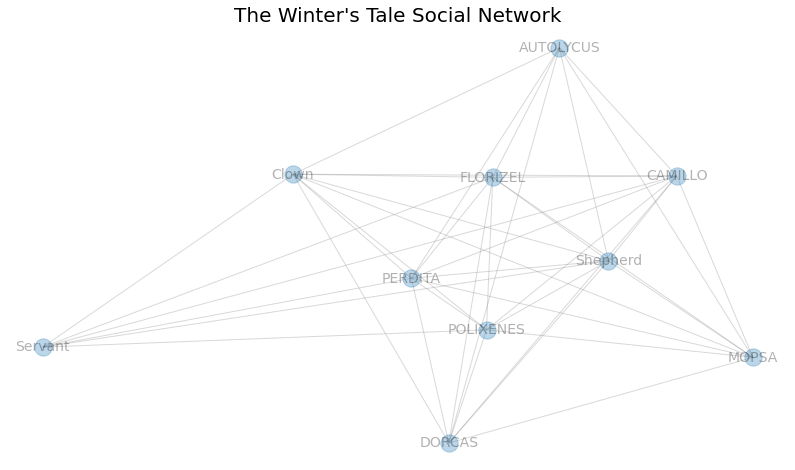

In [14]:
plt.figure(figsize=(14,8))  # make the figure size a little larger
plt.axis('off')  # remove the axis, which isn't meaningful in this case
plt.title("The Winter's Tale Social Network", fontsize=20)

# The 'k' argument determines how spaced out the nodes will be from
# one another on the graph.
pos = nx.spring_layout(A_Winters_Tale, k=0.5)

node_size = [data['size'] for __, data in A_Winters_Tale.nodes(data=True)]


nx.draw_networkx(
    A_Winters_Tale,
    pos=pos,
#    node_size = node_size,
    edge_color='gray',  # change edge color
    alpha=0.3,  # make nodes more transparent to make labels clearer
    font_size=14,
    with_labels=True,
    font_color="k"
)

In [15]:
A_Winters_Tale.edges()

EdgeView([('AUTOLYCUS', 'CAMILLO'), ('AUTOLYCUS', 'Clown'), ('AUTOLYCUS', 'DORCAS'), ('AUTOLYCUS', 'FLORIZEL'), ('AUTOLYCUS', 'MOPSA'), ('AUTOLYCUS', 'PERDITA'), ('AUTOLYCUS', 'Shepherd'), ('CAMILLO', 'Clown'), ('CAMILLO', 'DORCAS'), ('CAMILLO', 'FLORIZEL'), ('CAMILLO', 'MOPSA'), ('CAMILLO', 'PERDITA'), ('CAMILLO', 'POLIXENES'), ('CAMILLO', 'Servant'), ('CAMILLO', 'Shepherd'), ('Clown', 'DORCAS'), ('Clown', 'FLORIZEL'), ('Clown', 'MOPSA'), ('Clown', 'PERDITA'), ('Clown', 'POLIXENES'), ('Clown', 'Servant'), ('Clown', 'Shepherd'), ('DORCAS', 'FLORIZEL'), ('DORCAS', 'MOPSA'), ('DORCAS', 'PERDITA'), ('DORCAS', 'POLIXENES'), ('DORCAS', 'Shepherd'), ('FLORIZEL', 'MOPSA'), ('FLORIZEL', 'PERDITA'), ('FLORIZEL', 'POLIXENES'), ('FLORIZEL', 'Servant'), ('FLORIZEL', 'Shepherd'), ('MOPSA', 'PERDITA'), ('MOPSA', 'POLIXENES'), ('MOPSA', 'Shepherd'), ('PERDITA', 'POLIXENES'), ('PERDITA', 'Servant'), ('PERDITA', 'Shepherd'), ('POLIXENES', 'Servant'), ('POLIXENES', 'Shepherd'), ('Servant', 'Shepherd')])

In [16]:
pos_ = nx.spring_layout(A_Winters_Tale)

In [17]:
pos_

{'AUTOLYCUS': array([-0.50843995, -0.66548516]),
 'CAMILLO': array([ 0.53187462, -0.29662197]),
 'Clown': array([-0.45202839, -0.09549786]),
 'DORCAS': array([-0.62332353,  0.29583196]),
 'FLORIZEL': array([0.57441477, 0.24693788]),
 'MOPSA': array([-0.02772152, -0.73543212]),
 'PERDITA': array([ 0.06053984, -0.08626445]),
 'POLIXENES': array([0.34969218, 0.09377655]),
 'Servant': array([0.1814824, 1.       ]),
 'Shepherd': array([-0.08649041,  0.24275518])}

In [18]:
A_Winters_Tale.edges()[('AUTOLYCUS','CAMILLO')]

{'weight': 2.0}

In [19]:
def make_edge(x, y, text, width):
    
    '''Creates a scatter trace for the edge between x's and y's with given width

    Parameters
    ----------
    x    : a tuple of the endpoints' x-coordinates in the form, tuple([x0, x1, None])
    
    y    : a tuple of the endpoints' y-coordinates in the form, tuple([y0, y1, None])
    
    width: the width of the line

    Returns
    -------
    An edge trace that goes between x0 and x1 with specified width.
    '''
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

In [20]:
# For each edge, make an edge_trace, append to list
edge_trace = []
for edge in A_Winters_Tale.edges():
    
    if A_Winters_Tale.edges()[edge]['weight'] > 0:
        char_1 = edge[0]
        char_2 = edge[1]

        x0, y0 = pos_[char_1]
        x1, y1 = pos_[char_2]

        text   = char_1 + '--' + char_2 + ': ' + str(A_Winters_Tale.edges()[edge]['weight'])
        
        trace  = make_edge([x0, x1, None], [y0, y1, None], text,
                           0.3*A_Winters_Tale.edges()[edge]['weight']**1.75)

        edge_trace.append(trace)

In [21]:
# Make a node trace
node_trace = go.Scatter(x         = [],
                        y         = [],
                        text      = [],
                        textposition = "top center",
                        textfont_size = 10,
                        mode      = 'markers+text',
                        hoverinfo = 'none',
                        marker    = dict(color = [],
                                         size  = [],
                                         line  = None))
# For each node in midsummer, get the position and size and add to the node_trace
for node in A_Winters_Tale.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*A_Winters_Tale.nodes()[node]['size']])
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

In [22]:
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)


fig = go.Figure(layout = layout)

for trace in edge_trace:
    fig.add_trace(trace)

fig.add_trace(node_trace)

fig.update_layout(showlegend = False)

fig.update_xaxes(showticklabels = False)

fig.update_yaxes(showticklabels = False)

fig.show()
#py.iplot(fig, filename='a_winters_tale4-4_network')
py.plot(fig, filename='test.html')

'test.html'

# Alternate Plotting Method

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
winters_tale_